## 第四章

### example 4.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

[ 1.02825     2.36504167  2.3175      2.35083333  2.45183333  2.46616667
  2.46841667  2.48558333  2.415125    2.389875    2.41816667  2.39604167
  2.40104167  2.40083333  2.3835      2.36670833  2.365625    2.34858333
  2.334375    2.13354167  2.097375    2.09770833  2.13058333  2.096
  2.06404167  2.11508333  2.04733333  1.713875    1.60616667  1.56166667
  1.61329167  1.62108333  1.58766667  1.63779167  1.86591667  2.35641667
  3.81        3.797       3.906       3.937       3.969       3.971
  4.005       4.072       4.071       4.104       4.072       4.071
  5.218       5.165       5.008       4.955       5.136       4.977
  4.027       5.091       4.991       5.02        4.858       4.553
  4.148       4.099       3.914       3.921       3.854       3.845
  4.121       6.605       6.603       6.459       6.375       6.127
  6.014       5.523       5.179       4.816       4.294       4.159
  3.76        3.625       3.584       3.305       3.152       3.107
  3.276       3.287    

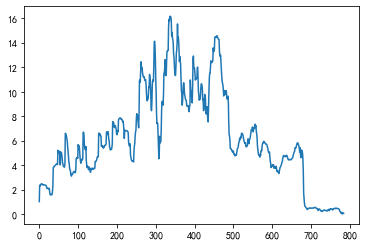

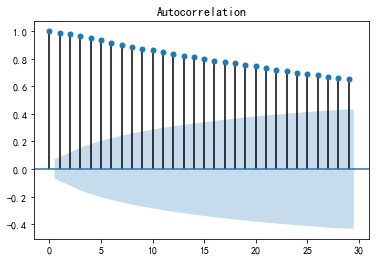

In [2]:
##这里开始读取数据
df = pd.read_excel('interest_rates.xlsx')
data1=df.iloc[3:788]
data=data1['Unnamed: 1'].tolist()
data=np.array(data)
print(data)
#画出时序图
plt.rcParams['font.sans-serif'] = ['SimHei']    #定义使其正常显示中文字体黑体
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示表示负号
plt.plot(data)
plt.show()
#画出自相关性图
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

原始序列的检验结果为： (-1.7537748552113088, 0.4036404438743394, 21, 763, {'1%': -3.4389495235166416, '5%': -2.8653354363373253, '10%': -2.56879107669766}, 902.7421499838515)
[ 1.33679167e+00 -4.75416667e-02  3.33333333e-02  1.01000000e-01
  1.43333333e-02  2.25000000e-03  1.71666667e-02 -7.04583333e-02
 -2.52500000e-02  2.82916667e-02 -2.21250000e-02  5.00000000e-03
 -2.08333340e-04 -1.73333333e-02 -1.67916667e-02 -1.08333333e-03
 -1.70416667e-02 -1.42083333e-02 -2.00833333e-01 -3.61666667e-02
  3.33333330e-04  3.28750000e-02 -3.45833333e-02 -3.19583333e-02
  5.10416667e-02 -6.77500000e-02 -3.33458333e-01 -1.07708333e-01
 -4.45000000e-02  5.16250000e-02  7.79166666e-03 -3.34166667e-02
  5.01250000e-02  2.28125000e-01  4.90500000e-01  1.45358333e+00
 -1.30000000e-02  1.09000000e-01  3.10000000e-02  3.20000000e-02
  2.00000000e-03  3.40000000e-02  6.70000000e-02 -1.00000000e-03
  3.30000000e-02 -3.20000000e-02 -1.00000000e-03  1.14700000e+00
 -5.30000000e-02 -1.57000000e-01 -5.30000000e-02  1.8100

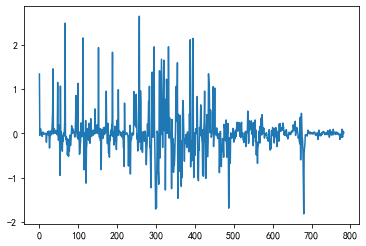

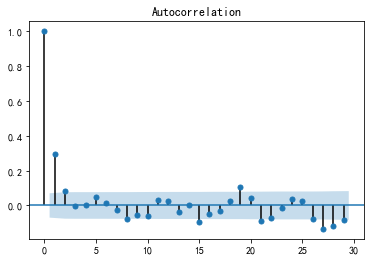

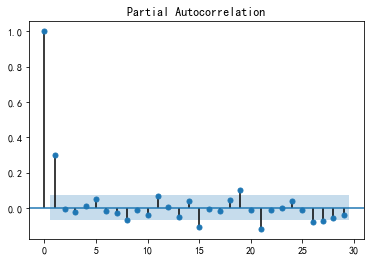

差分序列的ADF 检验结果为：  (-6.591050104448264, 7.113180208123616e-09, 20, 763, {'1%': -3.4389495235166416, '5%': -2.8653354363373253, '10%': -2.56879107669766}, 903.5811535071566)
差分序列的白噪声检验结果： (array([69.8147034]), array([6.51454612e-17]))
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  784
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -462.056
Method:                       css-mle   S.D. of innovations              0.436
Date:                Thu, 13 Aug 2020   AIC                            930.111
Time:                        13:40:36   BIC                            944.105
Sample:                             1   HQIC                           935.492
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

(array([0.08727113, 0.0865506 , 0.08583006, 0.08510953, 0.08438899]),
 array([0.43620933, 0.70779517, 0.90092698, 1.05941722, 1.19710496]),
 array([[-0.76768344,  0.94222571],
        [-1.30070245,  1.47380364],
        [-1.67995438,  1.8516145 ],
        [-1.99131007,  2.16152913],
        [-2.26189361,  2.43067159]]))

In [3]:
#平稳性检测
from statsmodels.tsa.stattools import adfuller
print('原始序列的检验结果为：',adfuller(data))
#原始序列的检验结果为： (1.8137710150945268, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155,
#  '10%': -2.6300945562130176, '5%': -2.981246804733728}, 299.46989866024177)
#返回值依次为：adf, pvalue p值， usedlag, nobs, critical values临界值 , icbest, regresults, resstore
#adf 分别大于3中不同检验水平的3个临界值，单位检测统计量对应的p 值显著大于 0.05 ， 说明序列可以判定为 非平
#对数据进行差分后得到 自相关图和 偏相关图

D_data = np.diff(data)
print(D_data)
plt.plot(D_data)
plt.show()
##这里可以看到一阶差分之后效果就很好了
plot_acf(D_data)    #画出自相关图
# plt.show()
plot_pacf(D_data)   #画出偏相关图
plt.show()
print(u'差分序列的ADF 检验结果为： ', adfuller(D_data))   #平稳性检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果：',acorr_ljungbox(D_data, lags= 1)) #返回统计量和 p 值
# 差分序列的白噪声检验结果：p值为第二项， 远小于 0.05

model = ARIMA(data, (0,1,1)).fit()
print(model.summary() )       #生成一份模型报告
model.forecast(5)   #为未来5天进行预测， 返回预测结果， 标准误差， 和置信区间

### example 4.2

[2.3414 2.3518 2.3552 ... 1.3399 1.3436 1.351 ]


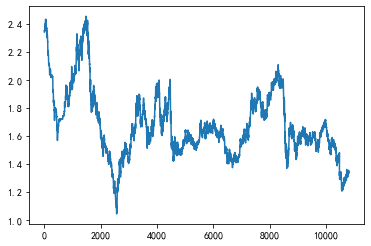

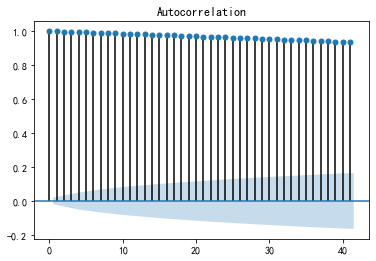

原始序列的检验结果为： (-2.955203324315912, 0.03929493905922501, 2, 10815, {'1%': -3.43095479452452, '5%': -2.8618072854216945, '10%': -2.566912270895225}, -68222.84876939279)
[ 0.0104  0.0034 -0.0067 ...  0.0012  0.0037  0.0074]


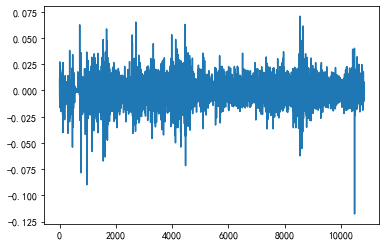

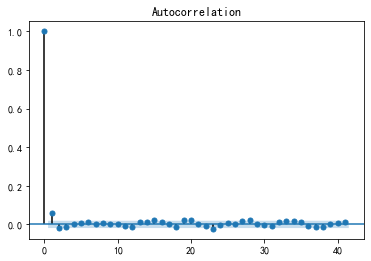

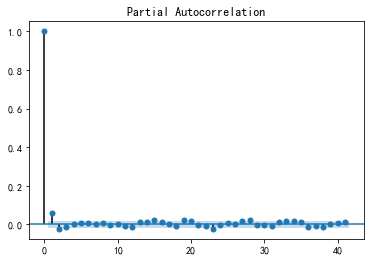

差分序列的ADF 检验结果为：  (-72.95091248782758, 0.0, 1, 10815, {'1%': -3.43095479452452, '5%': -2.8618072854216945, '10%': -2.566912270895225}, -68207.29138388563)
差分序列的白噪声检验结果： (array([39.22151123]), array([3.78348752e-10]))
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                10817
Model:                 ARIMA(0, 1, 1)   Log Likelihood               34238.095
Method:                       css-mle   S.D. of innovations              0.010
Date:                Thu, 13 Aug 2020   AIC                         -68470.189
Time:                        13:42:53   BIC                         -68448.323
Sample:                             1   HQIC                        -68462.816
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [4]:
df = pd.read_excel('dollar.xlsx')
data1=df.iloc[3:10822
      ]
data=data1['Unnamed: 1'].tolist()
data=np.array(data)
print(data)
#画出时序图
plt.rcParams['font.sans-serif'] = ['SimHei']    #定义使其正常显示中文字体黑体
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示表示负号
plt.plot(data)
plt.show()
#画出自相关性图
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

#平稳性检测
from statsmodels.tsa.stattools import adfuller
print('原始序列的检验结果为：',adfuller(data))
#原始序列的检验结果为： (1.8137710150945268, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155,
#  '10%': -2.6300945562130176, '5%': -2.981246804733728}, 299.46989866024177)
#返回值依次为：adf, pvalue p值， usedlag, nobs, critical values临界值 , icbest, regresults, resstore
#adf 分别大于3中不同检验水平的3个临界值，单位检测统计量对应的p 值显著大于 0.05 ， 说明序列可以判定为 非平
#对数据进行差分后得到 自相关图和 偏相关图

D_data = np.diff(data)
print(D_data)
plt.plot(D_data)
plt.show()
##这里可以看到一阶差分之后效果就很好了
plot_acf(D_data)    #画出自相关图
# plt.show()
plot_pacf(D_data)   #画出偏相关图
plt.show()
print(u'差分序列的ADF 检验结果为： ', adfuller(D_data))   #平稳性检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果：',acorr_ljungbox(D_data, lags= 1)) #返回统计量和 p 值
# 差分序列的白噪声检验结果：p值为第二项， 远小于 0.05

model = ARIMA(data, (0,1,1)).fit()
print(model.summary() )       #生成一份模型报告
model.forecast(5)   #为未来5天进行预测， 返回预测结果， 标准误差， 和置信区间
##进行R2检验
delta = model.fittedvalues - np.diff(data) # 残差
score = 1 - delta.var()/np.diff(data).var()
print(score)

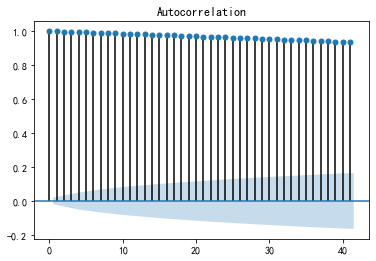

原始序列的检验结果为： (-2.955203324315912, 0.03929493905922501, 2, 10815, {'1%': -3.43095479452452, '5%': -2.8618072854216945, '10%': -2.566912270895225}, -68222.84876939279)
[ 0.0104  0.0034 -0.0067 ...  0.0012  0.0037  0.0074]


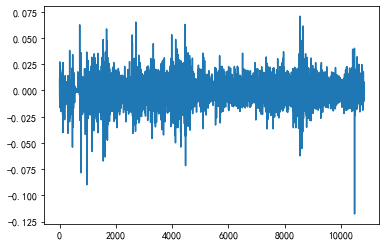

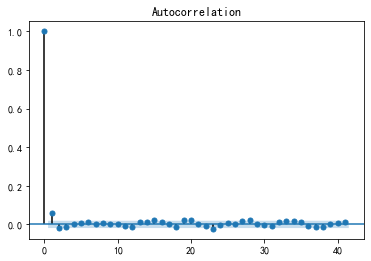

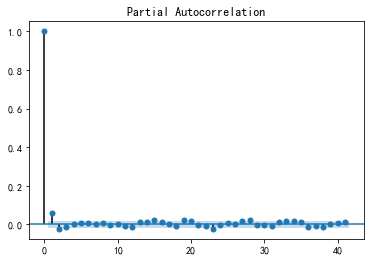

差分序列的ADF 检验结果为：  (-72.95091248782758, 0.0, 1, 10815, {'1%': -3.43095479452452, '5%': -2.8618072854216945, '10%': -2.566912270895225}, -68207.29138388563)
差分序列的白噪声检验结果： (array([39.22151123]), array([3.78348752e-10]))
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                10817
Model:                 ARIMA(0, 1, 3)   Log Likelihood               34240.883
Method:                       css-mle   S.D. of innovations              0.010
Date:                Thu, 13 Aug 2020   AIC                         -68471.766
Time:                        13:43:23   BIC                         -68435.321
Sample:                             1   HQIC                        -68459.477
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

#平稳性检测
from statsmodels.tsa.stattools import adfuller
print('原始序列的检验结果为：',adfuller(data))
#原始序列的检验结果为： (1.8137710150945268, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155,
#  '10%': -2.6300945562130176, '5%': -2.981246804733728}, 299.46989866024177)
#返回值依次为：adf, pvalue p值， usedlag, nobs, critical values临界值 , icbest, regresults, resstore
#adf 分别大于3中不同检验水平的3个临界值，单位检测统计量对应的p 值显著大于 0.05 ， 说明序列可以判定为 非平
#对数据进行差分后得到 自相关图和 偏相关图

D_data = np.diff(data)
print(D_data)
plt.plot(D_data)
plt.show()
##这里可以看到一阶差分之后效果就很好了
plot_acf(D_data)    #画出自相关图
# plt.show()
plot_pacf(D_data)   #画出偏相关图
plt.show()
print(u'差分序列的ADF 检验结果为： ', adfuller(D_data))   #平稳性检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果：',acorr_ljungbox(D_data, lags= 1)) #返回统计量和 p 值
# 差分序列的白噪声检验结果：p值为第二项， 远小于 0.05

model = ARIMA(data, (0,1,3)).fit()
print(model.summary() )       #生成一份模型报告
model.forecast(5)   #为未来5天进行预测， 返回预测结果， 标准误差， 和置信区间
##进行R2检验
delta = model.fittedvalues - np.diff(data) # 残差
score = 1 - delta.var()/np.diff(data).var()
print(score)